<a href="https://colab.research.google.com/github/Sushmashen/sushma/blob/main/Botnet_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division
import os, sys
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.tree import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from keras.models import *
from keras.layers import Dense, Activation
from keras.optimizers import *
import threading
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

# **Data Analysis**

In [ ]:
df = pd.read_csv('/content/Botnet.csv') 

In [ ]:
df.head()

,SourcedFrom,FileTimeUtc,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,Payload,SourceIpCountryCode,...,HttpUserAgent,HttpMethod,HttpVersion,HttpHost,Custom Field 1,Custom Field 2,Custom Field 3,Custom Field 4,Custom Field 5,Threat Confidence
0,SinkHoleMessage,1.310000e+17,B106-Jenxcus,219.92.234.26,1044,AS4788,204.95.99.86,4442,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1,SinkHoleMessage,1.310000e+17,B106-MULTI,115.135.242.250,57260,AS4788,204.95.99.109,88,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2,SinkHoleMessage,1.310000e+17,B106-MULTI,14.1.198.187,58859,AS45960,204.95.99.109,81,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
3,SinkHoleMessage,1.310000e+17,B106-Fynloski,60.48.251.19,53586,AS4788,204.95.99.66,5552,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
4,SinkHoleMessage,1.310000e+17,B106-CB,113.210.7.77,12277,AS9534,204.95.99.31,288,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High


In [ ]:
df.describe()

,FileTimeUtc,SourcePort,TargetPort,Payload,SourceIpRegion,SourceIpPostalCode,SourceIpLatitude,SourceIpLongitude,SourceIpMetroCode,SourceIpAreaCode,HttpVersion,Custom Field 1,Custom Field 2,Custom Field 3,Custom Field 4,Custom Field 5
count,7.999000e+03,7999.000000,7999.000000,0.0,7621.000000,4.0,7999.000000,7999.000000,7999.0,7999.0,3.0,0.0,0.0,0.0,0.0,0.0
mean,1.310000e+17,36095.886236,1624.576572,NaN,9.906049,50450.0,3.507096,102.721701,0.0,0.0,1.1,NaN,NaN,NaN,NaN,NaN
std,0.000000e+00,22053.655924,2129.280844,NaN,4.374148,0.0,1.238240,3.372854,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
min,1.310000e+17,1044.000000,4.000000,NaN,1.000000,50450.0,1.462000,100.198600,0.0,0.0,1.1,NaN,NaN,NaN,NaN,NaN
25%,1.310000e+17,12684.000000,88.000000,NaN,7.000000,50450.0,3.016700,101.616700,0.0,0.0,1.1,NaN,NaN,NaN,NaN,NaN
50%,1.310000e+17,49317.000000,991.000000,NaN,12.000000,50450.0,3.166700,101.700000,0.0,0.0,1.1,NaN,NaN,NaN,NaN,NaN
75%,1.310000e+17,54613.000000,1998.000000,NaN,14.000000,50450.0,4.469200,102.240500,0.0,0.0,1.1,NaN,NaN,NaN,NaN,NaN
max,1.310000e+17,65491.000000,14725.000000,NaN,17.000000,50450.0,6.441400,118.327000,0.0,0.0,1.1,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SourcedFrom          7999 non-null   object 
 1   FileTimeUtc          7999 non-null   float64
 2   Botnet               7999 non-null   object 
 3   SourceIp             7999 non-null   object 
 4   SourcePort           7999 non-null   int64  
 5   SourceIpAsnNr        7999 non-null   object 
 6   TargetIp             7999 non-null   object 
 7   TargetPort           7999 non-null   int64  
 8   Payload              0 non-null      float64
 9   SourceIpCountryCode  7999 non-null   object 
 10  SourceIpRegion       7621 non-null   float64
 11  SourceIpCity         7621 non-null   object 
 12  SourceIpPostalCode   4 non-null      float64
 13  SourceIpLatitude     7999 non-null   float64
 14  SourceIpLongitude    7999 non-null   float64
 15  SourceIpMetroCode    7999 non-null   i

In [ ]:
df.isnull().sum()

SourcedFrom               0
FileTimeUtc               0
Botnet                    0
SourceIp                  0
SourcePort                0
SourceIpAsnNr             0
TargetIp                  0
TargetPort                0
Payload                7999
SourceIpCountryCode       0
SourceIpRegion          378
SourceIpCity            378
SourceIpPostalCode     7995
SourceIpLatitude          0
SourceIpLongitude         0
SourceIpMetroCode         0
SourceIpAreaCode          0
HttpRequest             140
HttpReferrer           7678
HttpUserAgent          7993
HttpMethod             7996
HttpVersion            7996
HttpHost               7996
Custom Field 1         7999
Custom Field 2         7999
Custom Field 3         7999
Custom Field 4         7999
Custom Field 5         7999
Threat Confidence         0
dtype: int64

In [ ]:
df.columns

Index(['SourcedFrom', 'FileTimeUtc', 'Botnet', 'SourceIp', 'SourcePort',
       'SourceIpAsnNr', 'TargetIp', 'TargetPort', 'Payload',
       'SourceIpCountryCode', 'SourceIpRegion', 'SourceIpCity',
       'SourceIpPostalCode', 'SourceIpLatitude', 'SourceIpLongitude',
       'SourceIpMetroCode', 'SourceIpAreaCode', 'HttpRequest', 'HttpReferrer',
       'HttpUserAgent', 'HttpMethod', 'HttpVersion', 'HttpHost',
       'Custom Field 1', 'Custom Field 2', 'Custom Field 3', 'Custom Field 4',
       'Custom Field 5', 'Threat Confidence'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SourcedFrom          7999 non-null   object 
 1   FileTimeUtc          7999 non-null   float64
 2   Botnet               7999 non-null   object 
 3   SourceIp             7999 non-null   object 
 4   SourcePort           7999 non-null   int64  
 5   SourceIpAsnNr        7999 non-null   object 
 6   TargetIp             7999 non-null   object 
 7   TargetPort           7999 non-null   int64  
 8   Payload              0 non-null      float64
 9   SourceIpCountryCode  7999 non-null   object 
 10  SourceIpRegion       7621 non-null   float64
 11  SourceIpCity         7621 non-null   object 
 12  SourceIpPostalCode   4 non-null      float64
 13  SourceIpLatitude     7999 non-null   float64
 14  SourceIpLongitude    7999 non-null   float64
 15  SourceIpMetroCode    7999 non-null   i

In [ ]:
X = df.drop(columns=['SourcedFrom', 'FileTimeUtc', 'HttpRequest', 'HttpReferrer','SourceIpRegion', 'SourceIpCity',
       'HttpUserAgent', 'HttpMethod', 'HttpVersion', 'HttpHost','Payload','SourceIpPostalCode','SourceIpMetroCode','SourceIpAreaCode',
       'Custom Field 1', 'Custom Field 2', 'Custom Field 3', 'Custom Field 4',
       'Custom Field 5','Threat Confidence'])
X.head()

,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,SourceIpCountryCode,SourceIpLatitude,SourceIpLongitude
0,B106-Jenxcus,219.92.234.26,1044,AS4788,204.95.99.86,4442,MY,2.9927,101.7909
1,B106-MULTI,115.135.242.250,57260,AS4788,204.95.99.109,88,MY,6.1333,102.2386
2,B106-MULTI,14.1.198.187,58859,AS45960,204.95.99.109,81,MY,3.8077,103.3260
3,B106-Fynloski,60.48.251.19,53586,AS4788,204.95.99.66,5552,MY,3.0833,101.6500
4,B106-CB,113.210.7.77,12277,AS9534,204.95.99.31,288,MY,3.1667,101.7000


In [ ]:
y = df["Threat Confidence"]
Y = y
y.head()

0    High
1    High
2    High
3     Low
4    High
Name: Threat Confidence, dtype: object

# **Data** **Pre**-**Processing**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_features = []
for col, value in X.items():
    if value.dtype == 'object':
        categorical_features.append(col)

for col in categorical_features:
    X[col] = le.fit_transform(X[col])

X.head()

,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,SourceIpCountryCode,SourceIpLatitude,SourceIpLongitude
0,10,1361,1044,29,22,4442,0,2.9927,101.7909
1,11,424,57260,29,1,88,0,6.1333,102.2386
2,11,652,58859,28,1,81,0,3.8077,103.3260
3,6,1408,53586,29,18,5552,0,3.0833,101.6500
4,2,301,12277,32,13,288,0,3.1667,101.7000


In [ ]:
 X.columns

Index(['Botnet', 'SourceIp', 'SourcePort', 'SourceIpAsnNr', 'TargetIp',
       'TargetPort', 'SourceIpCountryCode', 'SourceIpLatitude',
       'SourceIpLongitude'],
      dtype='object')

In [ ]:
y = le.fit_transform(y)

In [ ]:
X.describe()

,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,SourceIpCountryCode,SourceIpLatitude,SourceIpLongitude
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.0,7999.000000,7999.000000
mean,9.605701,813.850231,36095.886236,26.402925,6.855357,1624.576572,0.0,3.507096,102.721701
std,4.478483,453.127582,22053.655924,8.107156,7.529069,2129.280844,0.0,1.238240,3.372854
min,0.000000,0.000000,1044.000000,0.000000,0.000000,4.000000,0.0,1.462000,100.198600
25%,10.000000,410.000000,12684.000000,29.000000,1.000000,88.000000,0.0,3.016700,101.616700
50%,11.000000,858.000000,49317.000000,29.000000,2.000000,991.000000,0.0,3.166700,101.700000
75%,11.000000,1236.000000,54613.000000,29.000000,13.000000,1998.000000,0.0,4.469200,102.240500
max,22.000000,1544.000000,65491.000000,34.000000,22.000000,14725.000000,0.0,6.441400,118.327000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6399 entries, 5155 to 2915
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Botnet               6399 non-null   int64  
 1   SourceIp             6399 non-null   int64  
 2   SourcePort           6399 non-null   int64  
 3   SourceIpAsnNr        6399 non-null   int64  
 4   TargetIp             6399 non-null   int64  
 5   TargetPort           6399 non-null   int64  
 6   SourceIpCountryCode  6399 non-null   int64  
 7   SourceIpLatitude     6399 non-null   float64
 8   SourceIpLongitude    6399 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 499.9 KB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1556 to 5419
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Botnet               1600 non-null   int64  
 1   SourceIp             1600 non-null   int64  
 2   SourcePort           1600 non-null   int64  
 3   SourceIpAsnNr        1600 non-null   int64  
 4   TargetIp             1600 non-null   int64  
 5   TargetPort           1600 non-null   int64  
 6   SourceIpCountryCode  1600 non-null   int64  
 7   SourceIpLatitude     1600 non-null   float64
 8   SourceIpLongitude    1600 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 125.0 KB


In [ ]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
y_test

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
X_train.shape

(6399, 9)

# **Exploratory Data Analysis (EDA)**

In [ ]:
import seaborn as sns

<AxesSubplot:title={'center':'Correlation matrix'}>

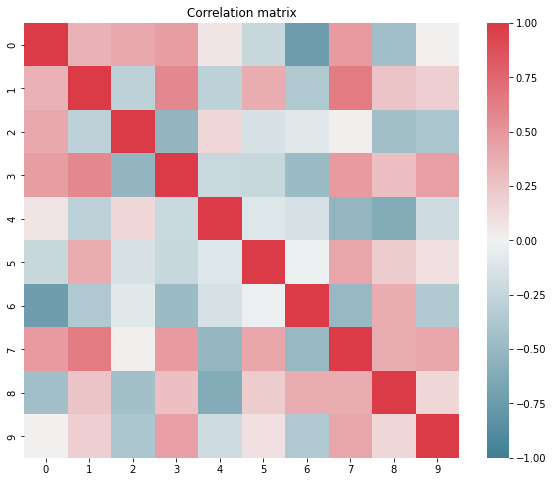

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
#corr.style.background_gradient(cmap='coolwarm')
#sns.heatmap(corr)
plt.title("Correlation matrix")
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

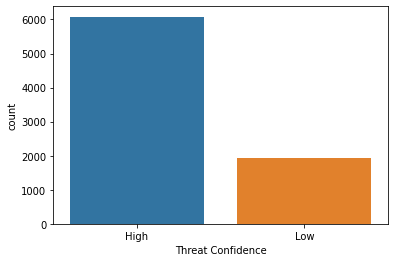

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
sns.countplot(data = X, x = Y)
 
# Show the plot
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


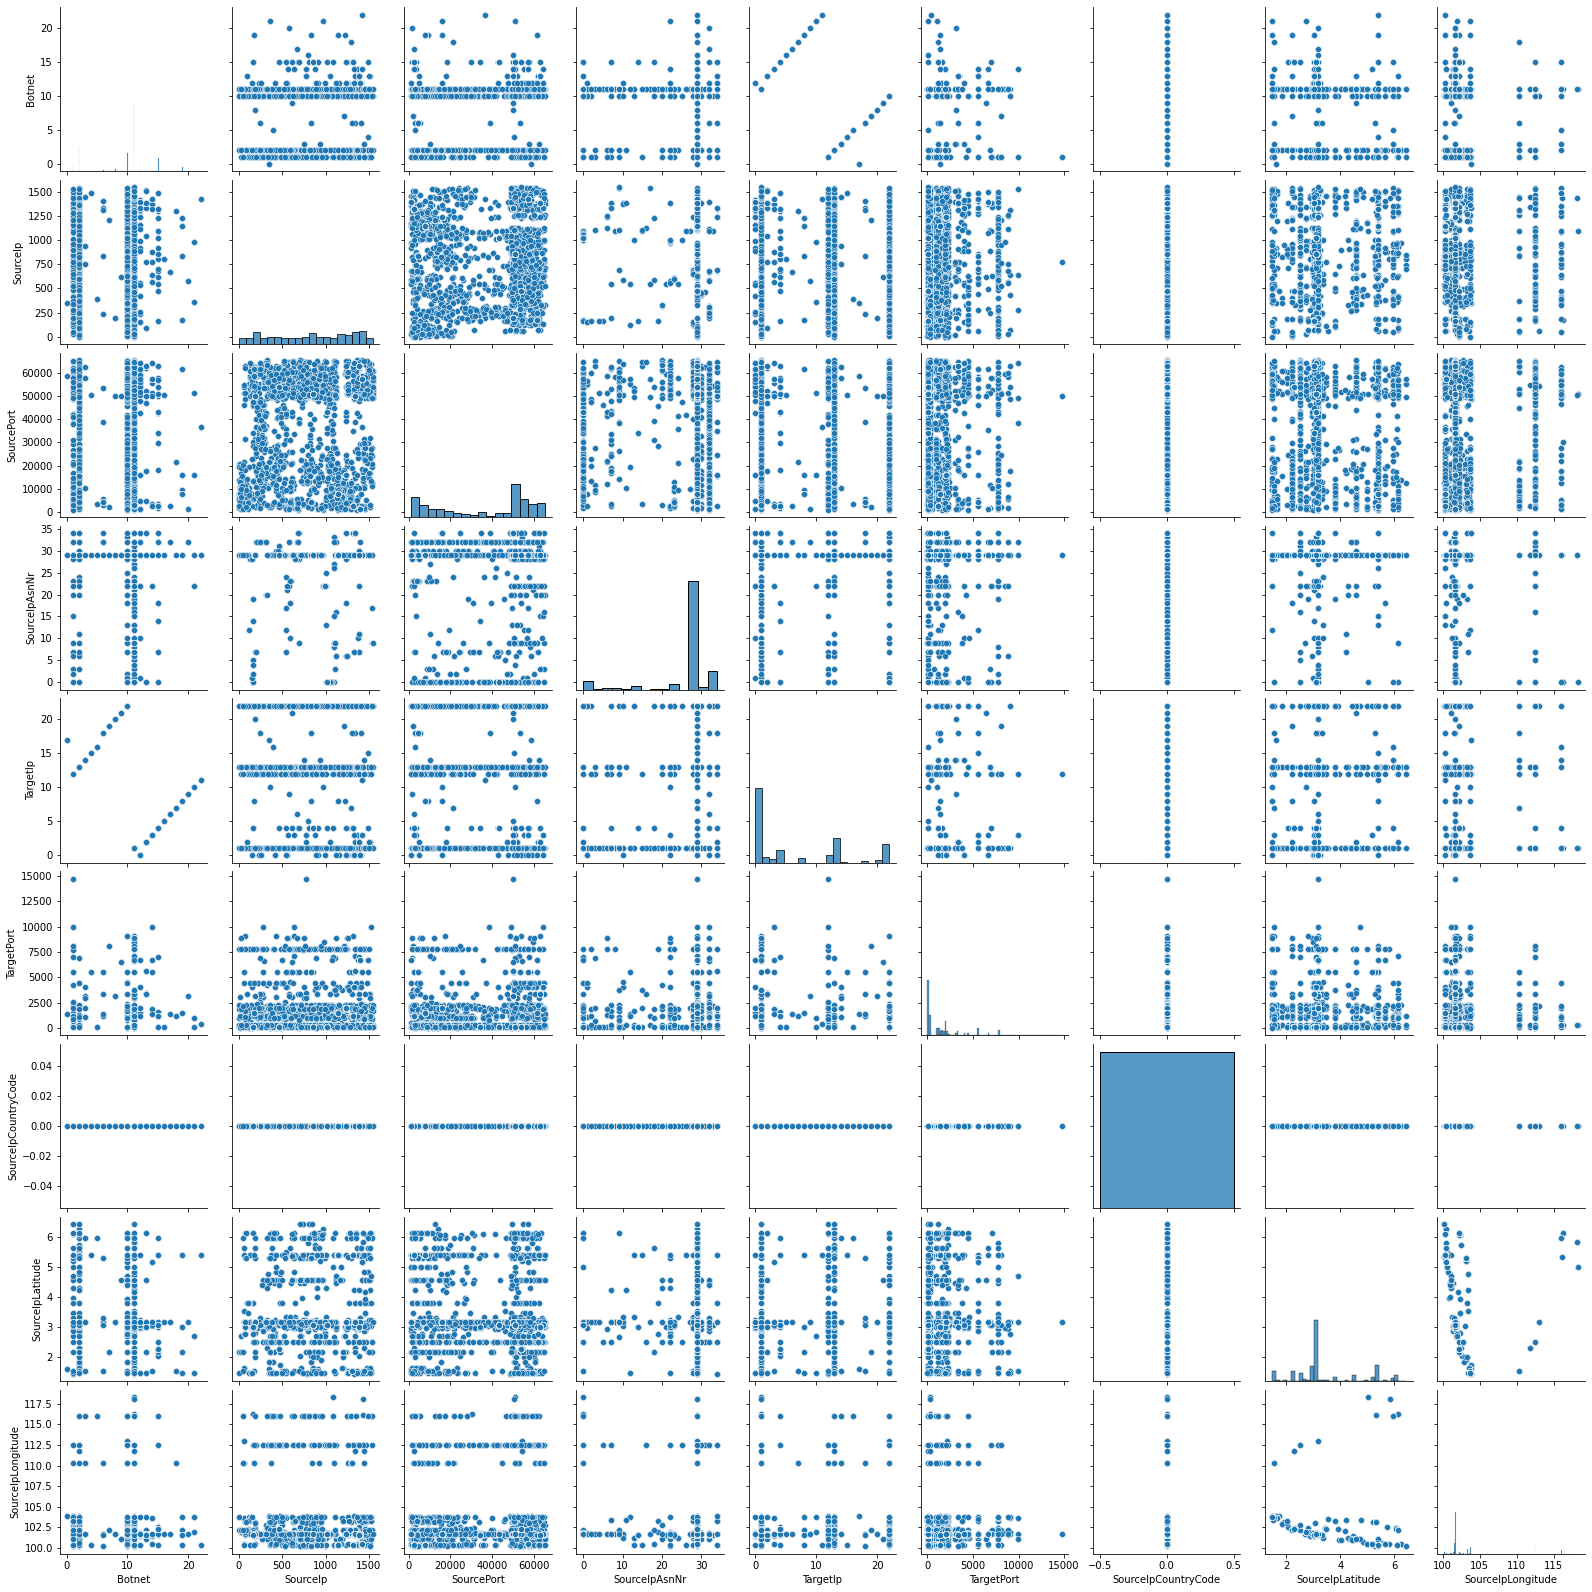

In [ ]:
sns.pairplot(X, size=2.5)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Threat Confidence', ylabel='count'>

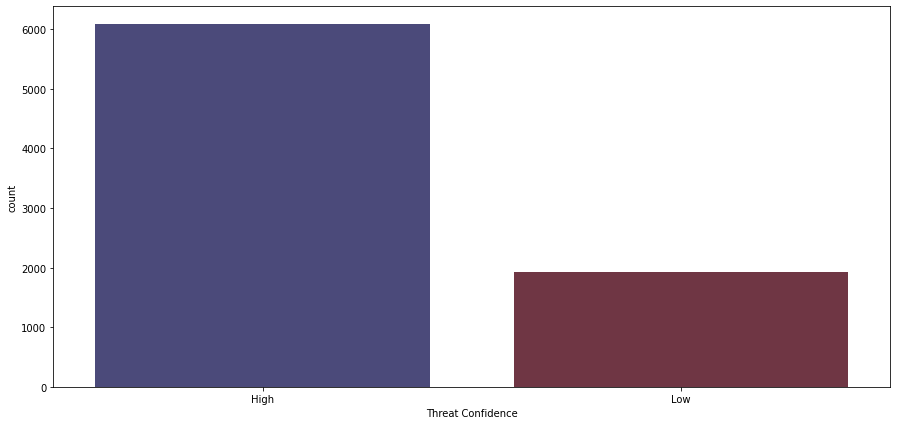

In [ ]:
plt.figure(figsize=(15,7))
g = sns.countplot(Y, palette="icefire")
g

# **Model Training**

# **Machine Learning**

# K Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=50)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = knn.predict(X_test)

knn_acc=accuracy_score(y_test,y_pred)
knn_acc

0.926875

In [ ]:
print("Training accuracy score of the model is:",accuracy_score(y_train, knn.predict(X_train))*100,"%")


print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 93.57712142522269 %
Testing accuracy score of the model is: 92.6875 %


In [ ]:
knn_cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix of the model \n",knn_cm)

Confusion matrix of the model 
 [[1161   68]
 [  49  322]]


<AxesSubplot:>

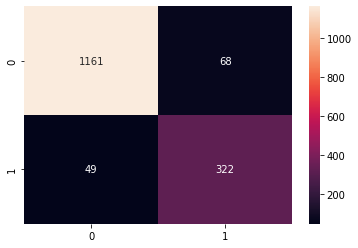

In [ ]:
import seaborn as sns
sns.heatmap(knn_cm, annot=True, fmt='d')

In [ ]:
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1229
           1       0.83      0.87      0.85       371

    accuracy                           0.93      1600
   macro avg       0.89      0.91      0.90      1600
weighted avg       0.93      0.93      0.93      1600



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2')
lr.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred = lr.predict(X_test)

acc=accuracy_score(y_test,y_pred)
acc

0.895

In [ ]:

print("Training accuracy score of the model is:",accuracy_score(y_train, lr.predict(X_train))*100,"%")


print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 88.93577121425223 %
Testing accuracy score of the model is: 89.5 %


In [ ]:
LOR_cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix of the model \n",LOR_cm)

Confusion matrix of the model 
 [[1184   45]
 [ 123  248]]


<AxesSubplot:>

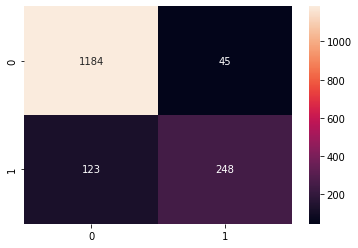

In [ ]:
import seaborn as sns
sns.heatmap(LOR_cm, annot=True, fmt='d')

In [ ]:
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1229
           1       0.85      0.67      0.75       371

    accuracy                           0.90      1600
   macro avg       0.88      0.82      0.84      1600
weighted avg       0.89      0.90      0.89      1600



# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)


SVC(probability=True)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

y_pred = svc.predict(X_test)

svc_acc=accuracy_score(y_test,y_pred)

svc_acc


0.768125

In [ ]:
print("Training accuracy score of the model is:",accuracy_score(y_train, svc.predict(X_train))*100,"%")


print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 75.82434755430536 %
Testing accuracy score of the model is: 76.8125 %


In [ ]:
svc_cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix of the model \n",svc_cm)

Confusion matrix of the model 
 [[1229    0]
 [ 371    0]]


<AxesSubplot:>

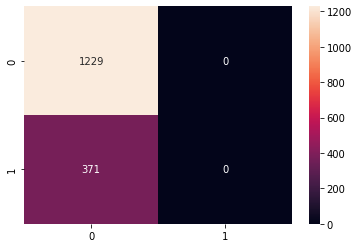

In [ ]:
import seaborn as sns
sns.heatmap(svc_cm, annot=True, fmt='d')

In [ ]:
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1229
           1       0.00      0.00      0.00       371

    accuracy                           0.77      1600
   macro avg       0.38      0.50      0.43      1600
weighted avg       0.59      0.77      0.67      1600



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'gini', max_depth = 1, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 4, n_estimators = 10)
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=10)

In [ ]:
y_pred = rfc.predict(X_test)

rfc_acc=accuracy_score(y_test,y_pred)

rfc_acc

0.861875

In [ ]:

print("Training accuracy score of the model is:",accuracy_score(y_train, rfc.predict(X_train))*100,"%")


print("Testing accuracy score of the model is:",accuracy_score(y_test,y_pred)*100,"%")

Training accuracy score of the model is: 85.49773402094077 %
Testing accuracy score of the model is: 86.1875 %


In [ ]:
rfc_cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix of the model \n",rfc_cm)

Confusion matrix of the model 
 [[1229    0]
 [ 221  150]]


<AxesSubplot:>

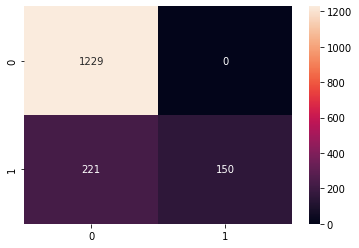

In [ ]:
import seaborn as sns
sns.heatmap(rfc_cm, annot=True, fmt='d')

In [ ]:
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1229
           1       1.00      0.40      0.58       371

    accuracy                           0.86      1600
   macro avg       0.92      0.70      0.75      1600
weighted avg       0.88      0.86      0.84      1600



# **Deep Learning**

# ANN

In [ ]:
import tensorflow as tf
import numpy as np

data=df

data.head()

,SourcedFrom,FileTimeUtc,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,Payload,SourceIpCountryCode,...,HttpUserAgent,HttpMethod,HttpVersion,HttpHost,Custom Field 1,Custom Field 2,Custom Field 3,Custom Field 4,Custom Field 5,Threat Confidence
0,SinkHoleMessage,1.310000e+17,B106-Jenxcus,219.92.234.26,1044,AS4788,204.95.99.86,4442,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1,SinkHoleMessage,1.310000e+17,B106-MULTI,115.135.242.250,57260,AS4788,204.95.99.109,88,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2,SinkHoleMessage,1.310000e+17,B106-MULTI,14.1.198.187,58859,AS45960,204.95.99.109,81,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
3,SinkHoleMessage,1.310000e+17,B106-Fynloski,60.48.251.19,53586,AS4788,204.95.99.66,5552,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
4,SinkHoleMessage,1.310000e+17,B106-CB,113.210.7.77,12277,AS9534,204.95.99.31,288,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High


In [ ]:
#X = data.drop(columns=['SourcedFrom', 'FileTimeUtc', 'HttpRequest', 'HttpReferrer','SourceIpRegion', 'SourceIpCity','HttpUserAgent', 'HttpMethod', 'HttpVersion', 'HttpHost','Payload','SourceIpPostalCode','SourceIpMetroCode','SourceIpAreaCode','Custom Field 1', 'Custom Field 2', 'Custom Field 3', 'Custom Field 4','Custom Field 5','Threat Confidence'])
#Y = data.drop(columns=['Target Confidence'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_features = []
for col, value in X.items():
    if value.dtype == 'object':
        categorical_features.append(col)

for col in categorical_features:
    X[col] = le.fit_transform(X[col])

X.head()

,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,SourceIpCountryCode,SourceIpLatitude,SourceIpLongitude
0,10,1361,1044,29,22,4442,0,2.9927,101.7909
1,11,424,57260,29,1,88,0,6.1333,102.2386
2,11,652,58859,28,1,81,0,3.8077,103.3260
3,6,1408,53586,29,18,5552,0,3.0833,101.6500
4,2,301,12277,32,13,288,0,3.1667,101.7000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(Y)

y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Botnet               7999 non-null   int64  
 1   SourceIp             7999 non-null   int64  
 2   SourcePort           7999 non-null   int64  
 3   SourceIpAsnNr        7999 non-null   int64  
 4   TargetIp             7999 non-null   int64  
 5   TargetPort           7999 non-null   int64  
 6   SourceIpCountryCode  7999 non-null   int64  
 7   SourceIpLatitude     7999 non-null   float64
 8   SourceIpLongitude    7999 non-null   float64
dtypes: float64(2), int64(7)
memory usage: 562.6 KB


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from keras.layers import Dense
from keras.models import Sequential
 
model = Sequential()
model.add(Dense(60, input_shape=(9,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f0bf4276d90>>

In [ ]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 15 , batch_size=20)

Epoch 1/15
320/320 [==============================] - 1s 3ms/step - loss: 5.8809 - accuracy: 0.8289 - val_loss: 1.3752 - val_accuracy: 0.9413
Epoch 2/15
320/320 [==============================] - 1s 4ms/step - loss: 5.3559 - accuracy: 0.8375 - val_loss: 1.6448 - val_accuracy: 0.8881
Epoch 3/15
320/320 [==============================] - 1s 4ms/step - loss: 5.7559 - accuracy: 0.8298 - val_loss: 1.3839 - val_accuracy: 0.9162
Epoch 4/15
320/320 [==============================] - 1s 4ms/step - loss: 4.9545 - accuracy: 0.8354 - val_loss: 1.3582 - val_accuracy: 0.9381
Epoch 5/15
320/320 [==============================] - 1s 4ms/step - loss: 2.9398 - accuracy: 0.8656 - val_loss: 5.8586 - val_accuracy: 0.6794
Epoch 6/15
320/320 [==============================] - 2s 5ms/step - loss: 5.6844 - accuracy: 0.8315 - val_loss: 10.5358 - val_accuracy: 0.6137
Epoch 7/15
320/320 [==============================] - 2s 5ms/step - loss: 6.1661 - accuracy: 0.8326 - val_loss: 34.2912 - val_accuracy: 0.7950
Epoc

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
 
y_pred = model.predict(X_test)


50/50 [==============================] - 0s 1ms/step


In [ ]:
y_pred = y_pred.flatten()
y_pred = y_pred.round(2)
y_pred = np.where(y_pred > 0.5, 1, 0)

In [ ]:
acc = accuracy_score(Y_test,y_pred)
model.evaluate(X_test, Y_test)[1]

50/50 [==============================] - 0s 2ms/step - loss: 9.8030 - accuracy: 0.8475


0.8475000262260437

In [ ]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[1204   10]
 [ 234  152]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1214
           1       0.94      0.39      0.55       386

    accuracy                           0.85      1600
   macro avg       0.89      0.69      0.73      1600
weighted avg       0.86      0.85      0.82      1600



# LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
model1= Sequential()

# Adding the input layerand the LSTM layer
model1.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


# Adding the output layer
model1.add(Dense(units = 1))
# Compiling the RNN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

# Fitting the RNN to the Training set
hist = model1.fit(X_train, Y_train, batch_size = 100, epochs = 60, verbose = 1)

Epoch 1/60
64/64 [==============================] - 3s 17ms/step - loss: 0.2217 - accuracy: 0.7606
Epoch 2/60
64/64 [==============================] - 1s 17ms/step - loss: 0.1938 - accuracy: 0.7606
Epoch 3/60
64/64 [==============================] - 1s 17ms/step - loss: 0.1791 - accuracy: 0.7606
Epoch 4/60
64/64 [==============================] - 1s 16ms/step - loss: 0.1680 - accuracy: 0.7603
Epoch 5/60
64/64 [==============================] - 1s 17ms/step - loss: 0.1540 - accuracy: 0.7870
Epoch 6/60
64/64 [==============================] - 1s 16ms/step - loss: 0.1366 - accuracy: 0.8075
Epoch 7/60
64/64 [==============================] - 1s 17ms/step - loss: 0.1245 - accuracy: 0.8225
Epoch 8/60
64/64 [==============================] - 1s 17ms/step - loss: 0.1166 - accuracy: 0.8389
Epoch 9/60
64/64 [==============================] - 2s 35ms/step - loss: 0.3391 - accuracy: 0.8243
Epoch 10/60
64/64 [==============================] - 1s 17ms/step - loss: 0.1178 - accuracy: 0.8201
Epoch 11/

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
y_pred = model1.predict(X_test)
y_pred = y_pred.flatten()
y_pred = y_pred.round(2)
y_pred = np.where(y_pred > 0.5, 1, 0)
accuracy_score(y_pred,Y_test)

50/50 [==============================] - 0s 3ms/step


0.95625

In [ ]:
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[1203   11]
 [  59  327]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1214
           1       0.97      0.85      0.90       386

    accuracy                           0.96      1600
   macro avg       0.96      0.92      0.94      1600
weighted avg       0.96      0.96      0.96      1600



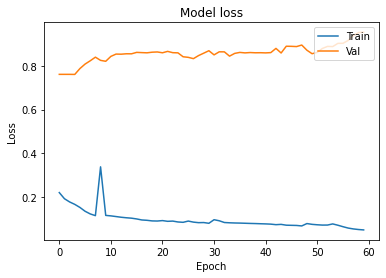

In [ ]:
import matplotlib.pyplot as plt


plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()